In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import os

In [3]:
data_folder = os.path.join(os.path.abspath(os.curdir), os.pardir, "data")

In [4]:
training_data = os.path.join(data_folder, "processed", "train_train.csv")

In [5]:
df = pd.read_csv(training_data)

In [61]:
subsampled_df = df.sample(frac=0.1, replace=False, random_state=0)

In [62]:
subsampled_df.shape

(120274, 19)

In [63]:
df.shape

(1202739, 19)

In [64]:
subsampled_df.head()

,Unnamed: 0,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
223617,24527,d2e60e7f02eb,8ab1dcf8ae00,Тюменская область,Тюмень,Транспорт,Автомобили,С пробегом,Peugeot,407,"Peugeot 407, 2006",+ ++++Только у нас!/\r\n/\r\n+Юридическое сопр...,315000.0,1689,2017-03-19,Company,bfe0f269734a36022d8f9ed3080c52508ceda3948f7623...,1132.0,0.00000
506290,138293,dfb1a5b562d7,d0a2ffcd7b0f,Иркутская область,Братск,Бытовая электроника,Настольные компьютеры,NaN,NaN,NaN,Системный блок Acer (i5),"Intel Core i5-3330 3.0 GHz / GeForce GT 625, 2...",18500.0,728,2017-03-25,Shop,14de02f13446f40796af7c9be5dd54afc0b9758af2761a...,2789.0,0.00000
611342,205587,233bd90b2585,5ffa26fd101d,Челябинская область,Челябинск,Личные вещи,Детская одежда и обувь,Для девочек,Трикотаж,110-116 см (4-6 лет),Футболки,"Футболки с длинным рукавом белая, розовая и зе...",50.0,345,2017-03-17,Company,08d733bb2c05103d1d45b874455fe5cf55fb3ae6db26c7...,111.0,0.00000
358153,1021800,9dcd4eaff44e,7a763d840a81,Краснодарский край,Ейск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,Телевизор,Оникс с плоским ки не скопом 54см в прекрасном...,1600.0,9,2017-03-26,Company,c04d6059a66c4b786e933f78dec4caf41023fd88dcb821...,3022.0,0.21651
874693,910900,43349e5ce6df,8db0650e5a00,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Свадебные платья,Без размера,Новое свадебное платье 02028 Много в наличии,- Новое свадебное платье: из жаккарда с розами...,14000.0,1434,2017-03-23,Company,380eac54ee5214e07fcbdffd9517e0369050c0ea782b29...,560.0,0.00000


In [65]:
import pprint

In [66]:
pp = pprint.PrettyPrinter(indent=0)

In [67]:
pp.pprint(subsampled_df.columns.tolist())

['Unnamed: 0',
'item_id',
'user_id',
'region',
'city',
'parent_category_name',
'category_name',
'param_1',
'param_2',
'param_3',
'title',
'description',
'price',
'item_seq_number',
'activation_date',
'user_type',
'image',
'image_top_1',
'deal_probability']


In [107]:
sns.set(rc={'figure.figsize':(20,15)})

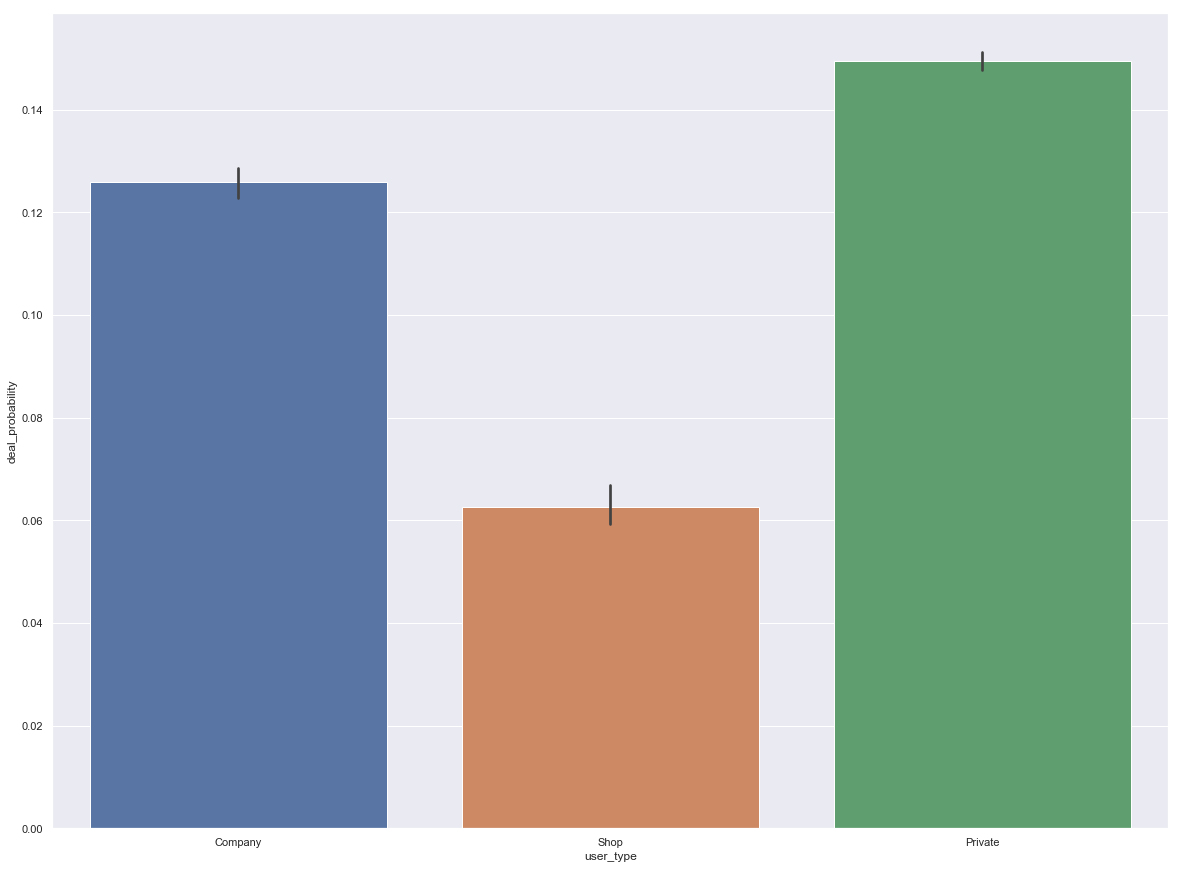

In [108]:
sns.barplot(x="user_type", y="deal_probability", data=subsampled_df)

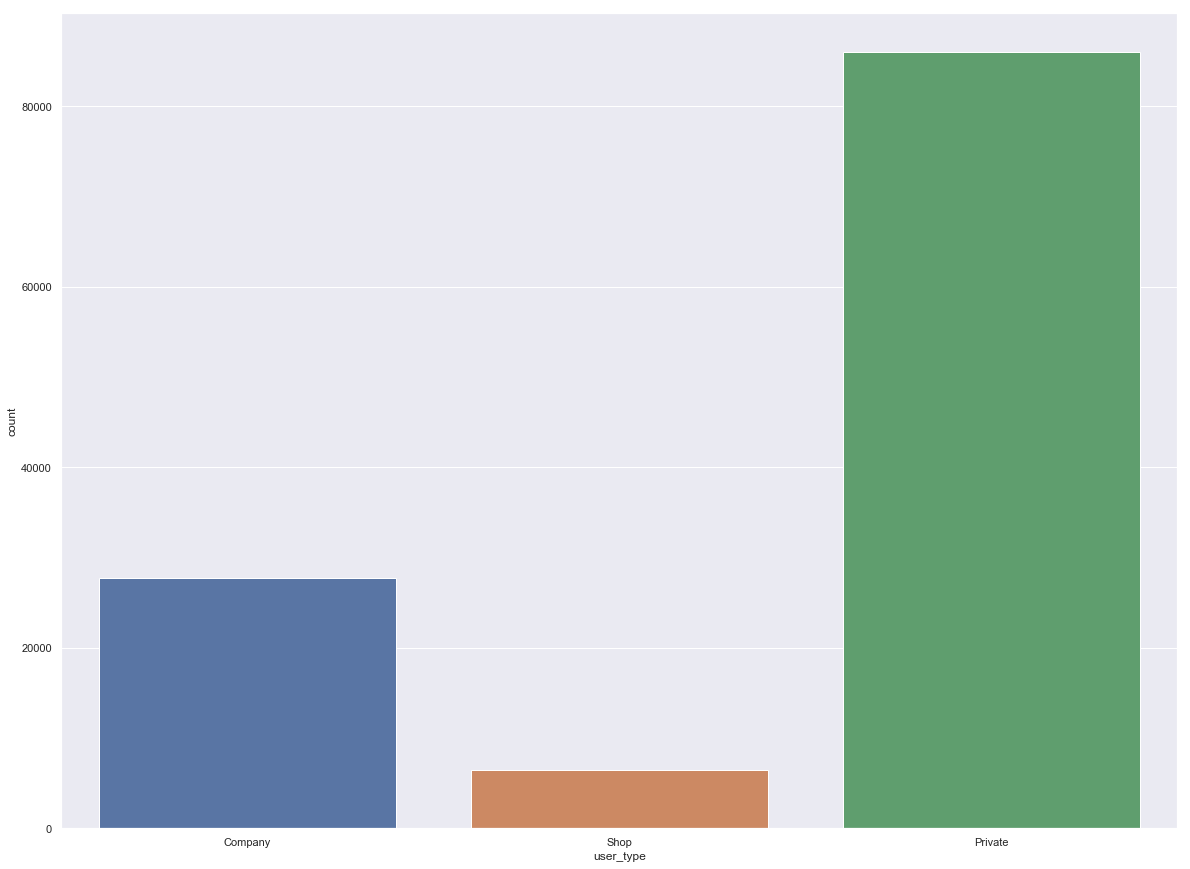

In [125]:
sns.countplot(x="user_type", data=subsampled_df)

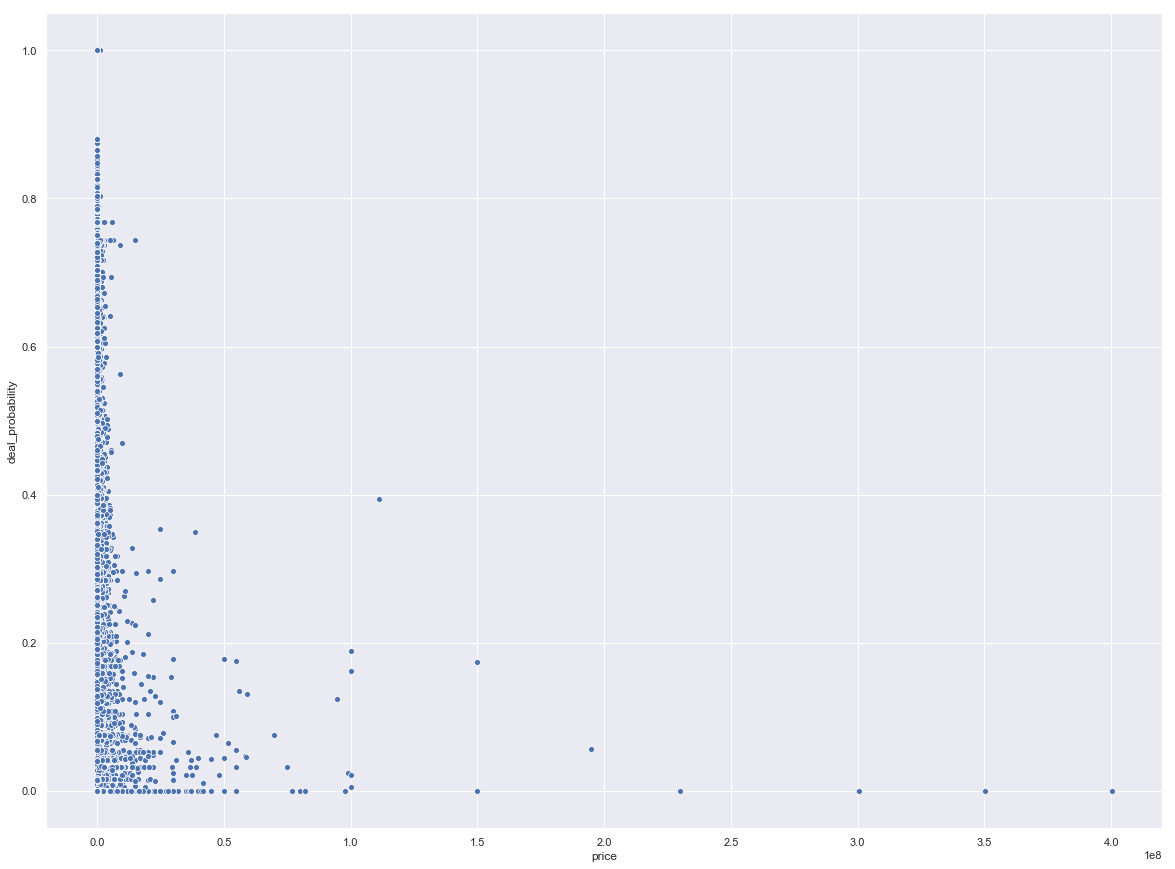

In [109]:
sns.scatterplot(x="price", y="deal_probability", data=subsampled_df)

In [110]:
subsampled_df.price.mean()

260154.17874425944

In [111]:
subsampled_df[subsampled_df.price > 0].price.mean()

260947.73846616328

In [112]:
subsampled_df[subsampled_df.price == 0].price.count()

345

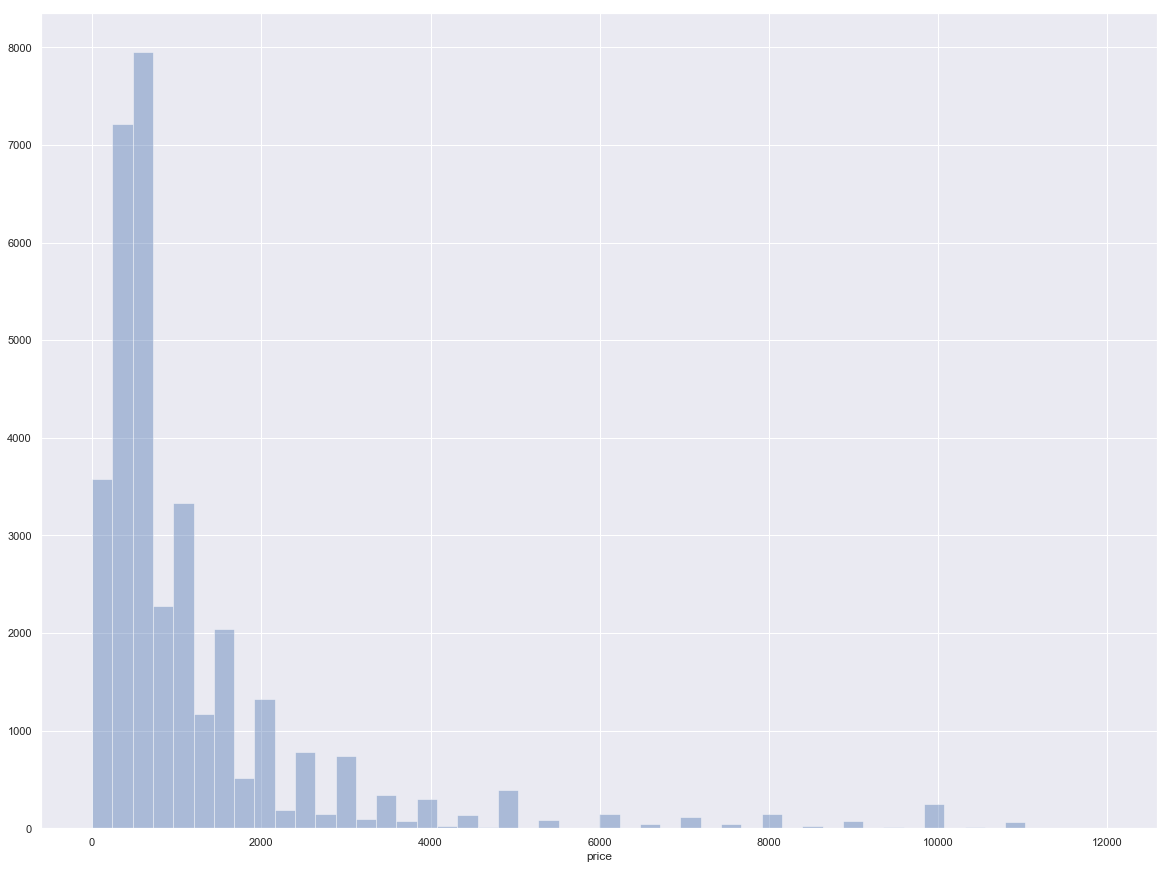

In [113]:
sns.distplot(subsampled_df[subsampled_df.price < subsampled_df.price.quantile(0.8)].dropna().price, kde=False)

In [114]:
len(df.city.unique())

1721

In [115]:
len(subsampled_df.category_name.unique())

47

In [116]:
len(subsampled_df.parent_category_name.unique())

9

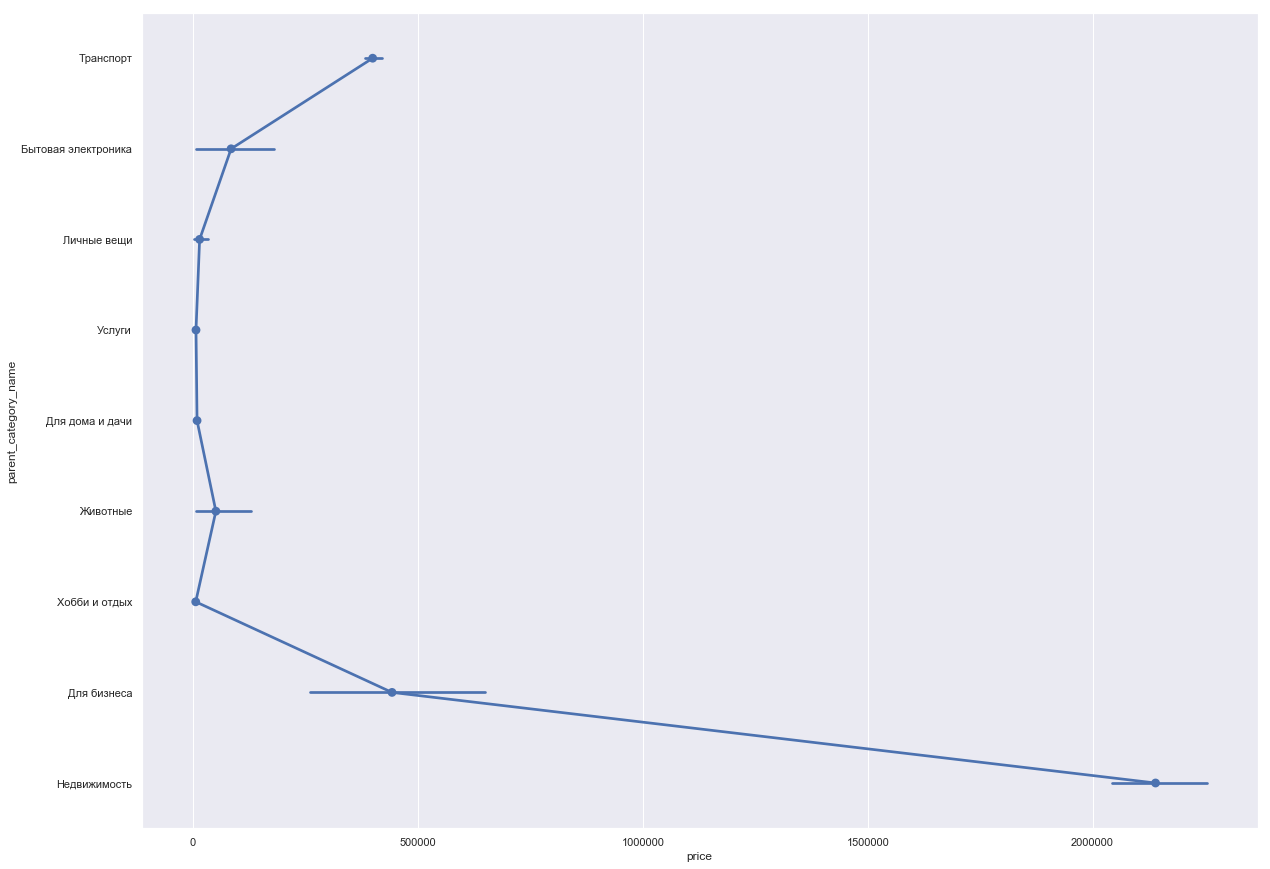

In [117]:
sns.pointplot(x = "price", y = "parent_category_name", data=subsampled_df)

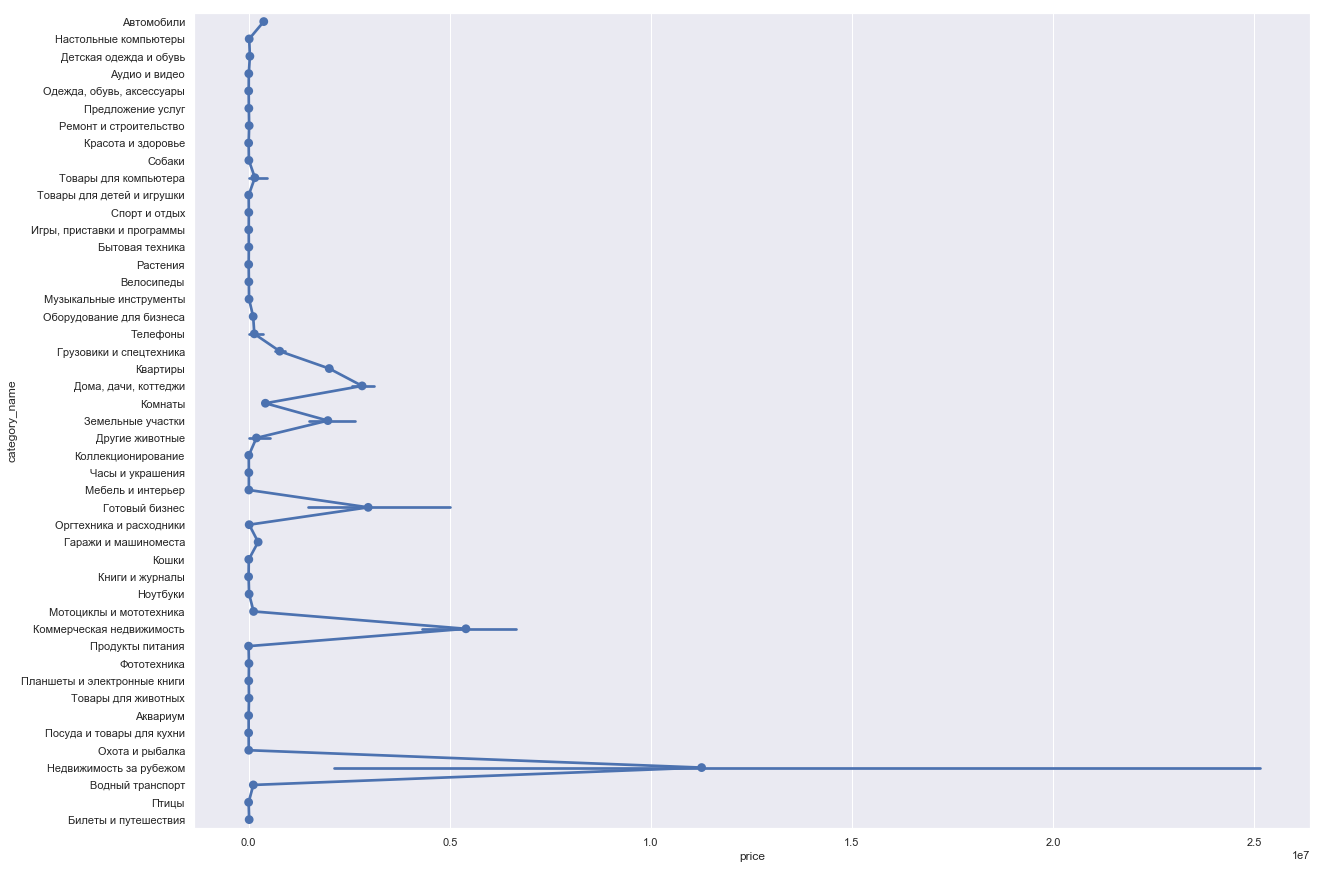

In [118]:
sns.pointplot(x = "price", y="category_name", data=subsampled_df)

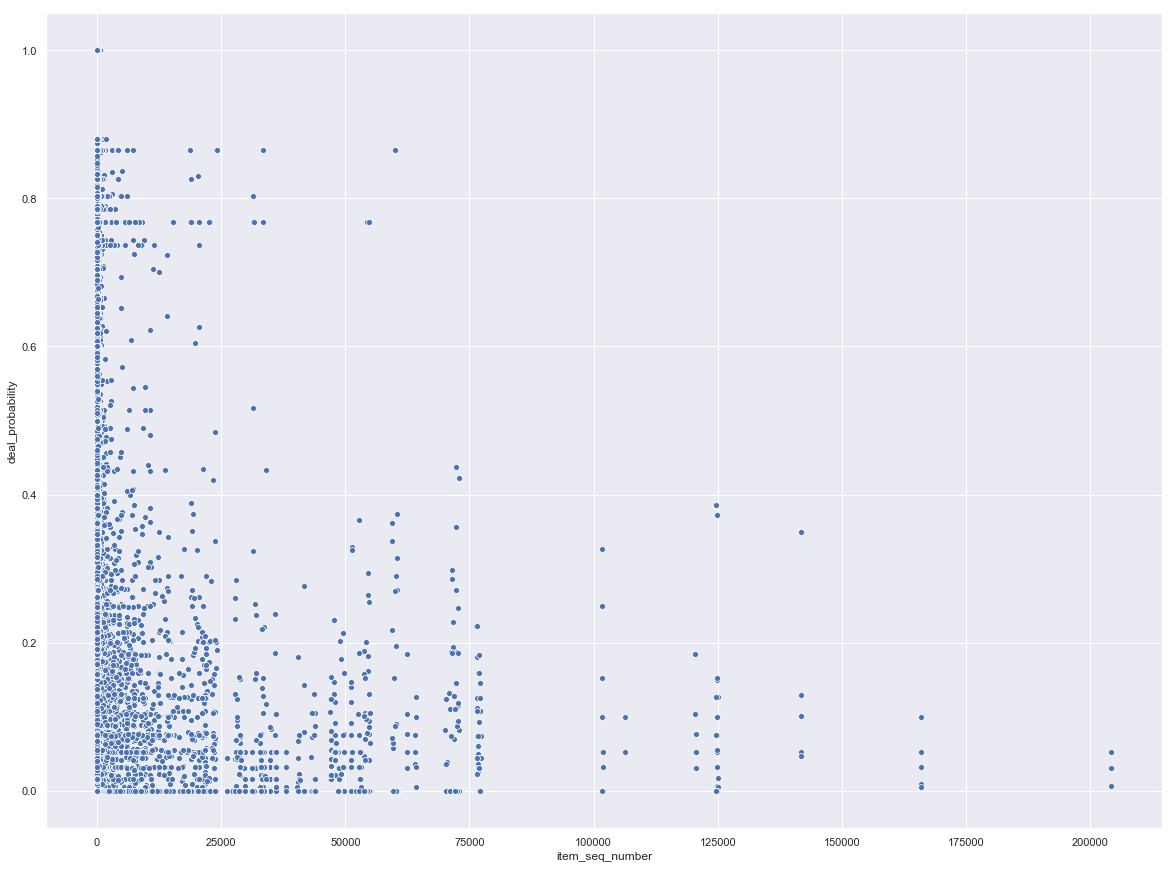

In [127]:
sns.scatterplot(x="item_seq_number", y="deal_probability", data=subsampled_df)

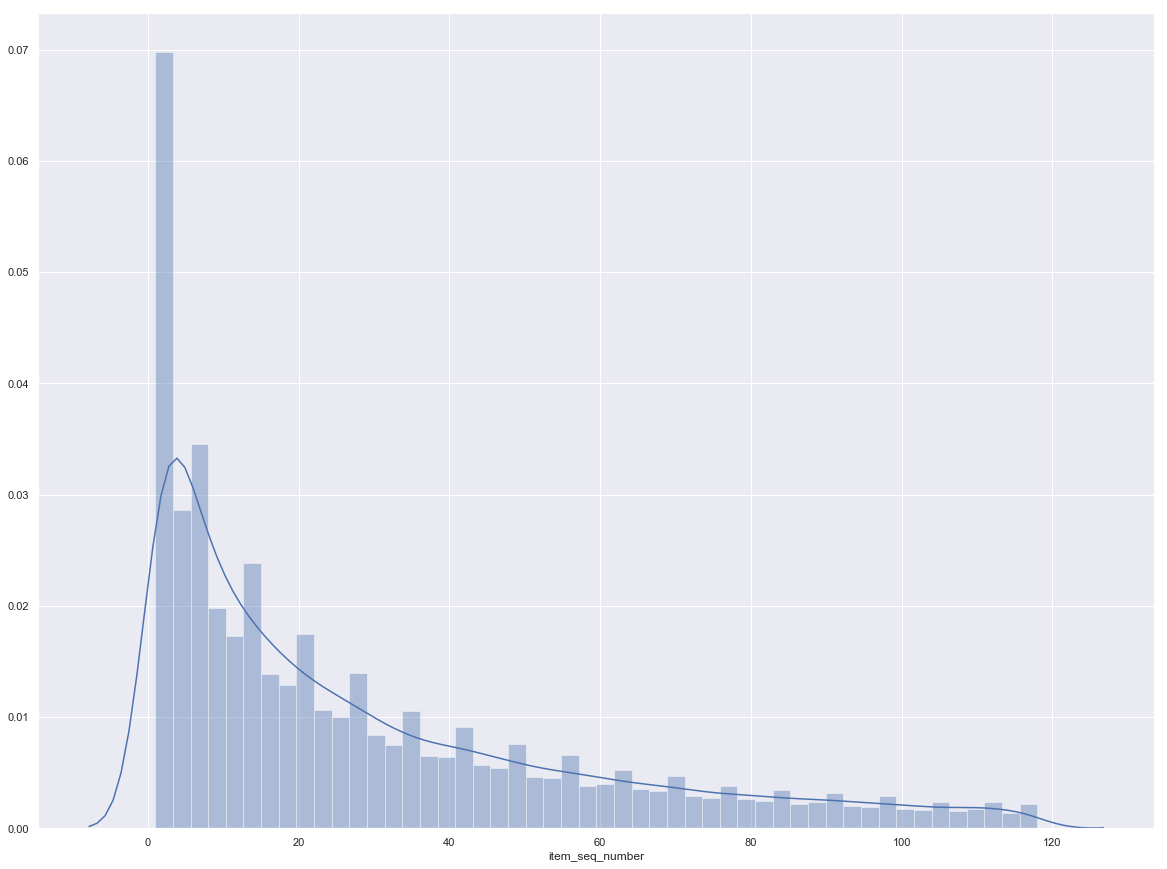

In [133]:
sns.distplot(subsampled_df.item_seq_number[subsampled_df.item_seq_number < subsampled_df.item_seq_number.quantile(0.8)])

[<matplotlib.text.Text object at 0x000001C453CC67F0>, <matplotlib.text.Text object at 0x000001C453CCA160>, <matplotlib.text.Text object at 0x000001C453DA24A8>, <matplotlib.text.Text object at 0x000001C453DA2F28>, <matplotlib.text.Text object at 0x000001C453DA79E8>, <matplotlib.text.Text object at 0x000001C453DAC4A8>, <matplotlib.text.Text object at 0x000001C453DACF28>, <matplotlib.text.Text object at 0x000001C453DB29E8>, <matplotlib.text.Text object at 0x000001C453DB54A8>, <matplotlib.text.Text object at 0x000001C453DB5F28>, <matplotlib.text.Text object at 0x000001C453DB99E8>, <matplotlib.text.Text object at 0x000001C453DBD4A8>, <matplotlib.text.Text object at 0x000001C453DBDF28>, <matplotlib.text.Text object at 0x000001C453DC29E8>, <matplotlib.text.Text object at 0x000001C453DC74A8>, <matplotlib.text.Text object at 0x000001C453DC7F28>, <matplotlib.text.Text object at 0x000001C453DCC9E8>, <matplotlib.text.Text object at 0x000001C453DD04A8>, <matplotlib.text.Text object at 0x000001C453D

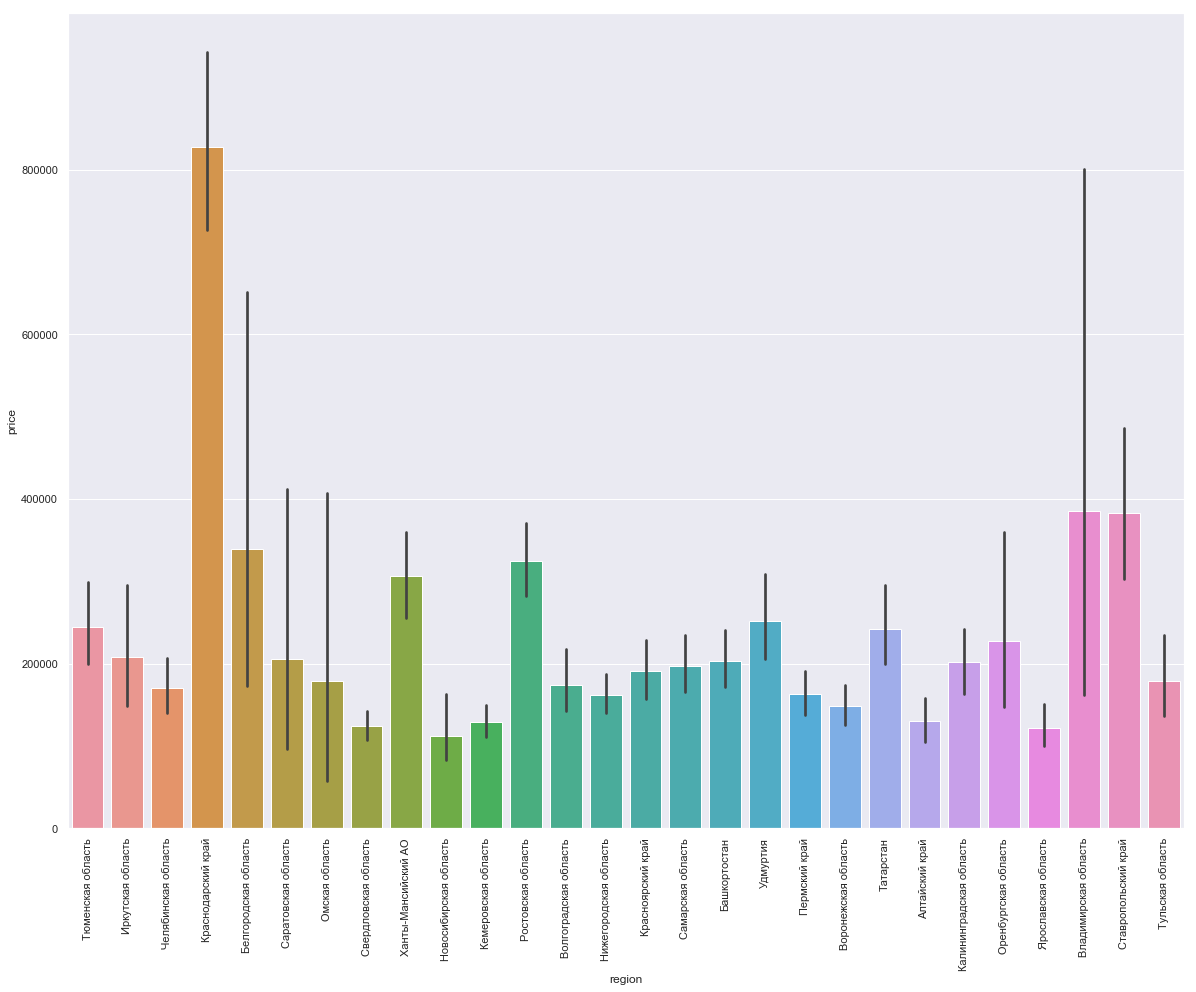

In [154]:
ax = sns.barplot(x="region", y="price", data=subsampled_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[<matplotlib.text.Text object at 0x000001C453DB27B8>, <matplotlib.text.Text object at 0x000001C453E102B0>, <matplotlib.text.Text object at 0x000001C453EF15C0>, <matplotlib.text.Text object at 0x000001C453EF4080>, <matplotlib.text.Text object at 0x000001C453EF4B00>, <matplotlib.text.Text object at 0x000001C453EFA5C0>, <matplotlib.text.Text object at 0x000001C453EFF080>, <matplotlib.text.Text object at 0x000001C453EFFB00>, <matplotlib.text.Text object at 0x000001C453F025C0>, <matplotlib.text.Text object at 0x000001C453F06080>, <matplotlib.text.Text object at 0x000001C453F06B00>, <matplotlib.text.Text object at 0x000001C453F0C5C0>, <matplotlib.text.Text object at 0x000001C453F11080>, <matplotlib.text.Text object at 0x000001C453F11B00>, <matplotlib.text.Text object at 0x000001C453F145C0>, <matplotlib.text.Text object at 0x000001C453F1B080>, <matplotlib.text.Text object at 0x000001C453F1BB00>, <matplotlib.text.Text object at 0x000001C453F1F5C0>, <matplotlib.text.Text object at 0x000001C453F

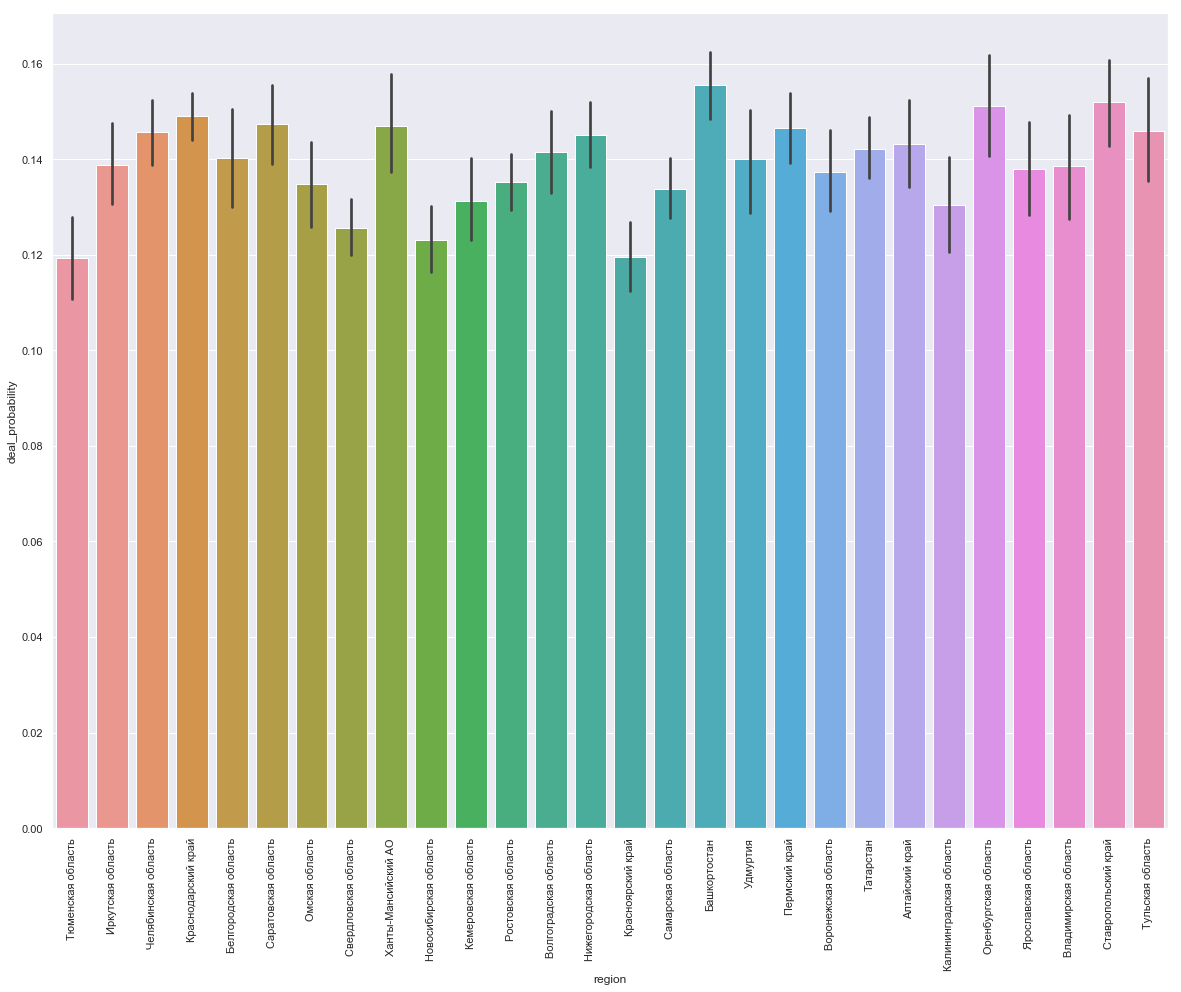

In [155]:
ax = sns.barplot(x="region", y="deal_probability", data=subsampled_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [138]:
most_common_regions = subsampled_df.region

In [143]:
regions, counts = np.unique(subsampled_df.region.values, return_counts=True)

In [151]:
sns.barplot(regions[np.argsort(counts)][:10]

array(['Тульская область', 'Владимирская область', 'Удмуртия',
       'Белгородская область', 'Оренбургская область',
       'Ханты-Мансийский АО', 'Калининградская область',
       'Ярославская область', 'Тюменская область', 'Ставропольский край'], dtype=object)